In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.models import load_model
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pickle
import pandas as pd
import time
from datetime import datetime
from datetime import timedelta
import datetime
import calendar



start_time = time.time()


In [2]:
#Importing Listed Companies data

headcheck = 0

lcd = pd.read_csv('file:///C:/Users/Abhishek%20Rao/Documents/case%20study/LC DATA.csv')

lcd




,Sr No,Symbol,Company Name,"Market capitalization as on December 31, 2021\n(Rs in Lakhs)"
0,1,RELIANCE,Reliance Industries Limited,160138207
1,2,TCS,Tata Consultancy Services Limited,138283487
2,3,HDFCBANK,HDFC Bank Limited,81983196
3,4,INFY,Infosys Limited,80445056
4,5,HINDUNILVR,Hindustan Unilever Limited,55453878
...,...,...,...,...
2000,2001,SBIHOMEFIN,SBI Home Finance Limited,"* Not Traded as on December 31, 2021"
2001,2002,SYNCOM,Syncom Healthcare Limited,"* Not Traded as on December 31, 2021"
2002,2003,SMPL,Splendid Metal Products Limited,"* Not Traded as on December 31, 2021"
2003,NaN,NaN,NaN,NaN


In [3]:
#Taking the Symbols from the dataframe to list
company_list=[]
company_list = list(lcd['Symbol'])
#print(company_list)


#MACRO
START_SL = 40
END_SL = 60
SOUND = 0
ALL_STOCK_PATH = "ALL STOCKS/ML ready stocks.csv"


for i in range(START_SL,END_SL):
    print(company_list[i])


NTPC
SBILIFE
ZOMATO
HINDALCO
GRASIM
IOC
M&M
DABUR
NYKAA
GODREJCP
SHREECEM
DLF
BAJAJ-AUTO
COALINDIA
SBICARD
HAVELLS
BRITANNIA
PAYTM
SIEMENS
BPCL


NTPC.NS


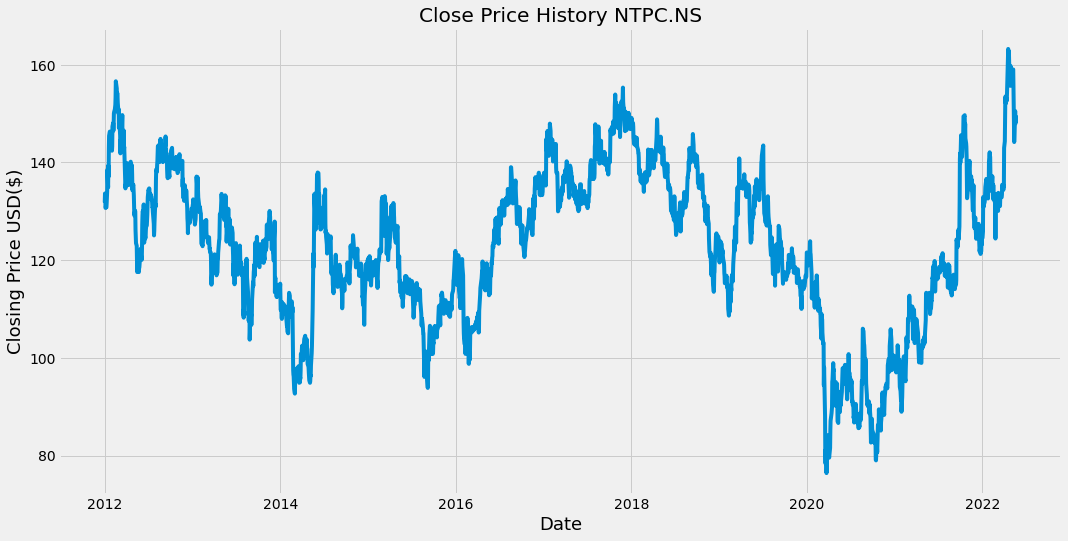

[array([0.63815292, 0.65927421, 0.65735403, 0.62519209, 0.62663218,
       0.62663218, 0.63671282, 0.65303375, 0.66407458, 0.71543781,
       0.67367513, 0.72503836, 0.6991167 , 0.76584104, 0.79512297,
       0.80520362, 0.80328343, 0.79752307, 0.79080269, 0.76872122,
       0.7730415 , 0.76008067, 0.77016131, 0.81720427, 0.82536491,
       0.80712362, 0.82152454, 0.84792629, 0.85128657, 0.85752685,
       0.86376731, 0.86808759, 0.88584878, 0.92377109, 0.90697008,
       0.87480796, 0.89640934, 0.88344851, 0.85608676, 0.84840638,
       0.85800694, 0.81384417, 0.83832574, 0.80616362, 0.79560288,
       0.75384021, 0.78696233, 0.77208149, 0.78312214, 0.82488482,
       0.84408611, 0.77448159, 0.7706414 , 0.78216214, 0.80760371,
       0.76392086, 0.76920131, 0.70823735, 0.69431651, 0.67127504])]
[0.6799155914684027]

[array([0.63815292, 0.65927421, 0.65735403, 0.62519209, 0.62663218,
       0.62663218, 0.63671282, 0.65303375, 0.66407458, 0.71543781,
       0.67367513, 0.72503836, 0.699

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


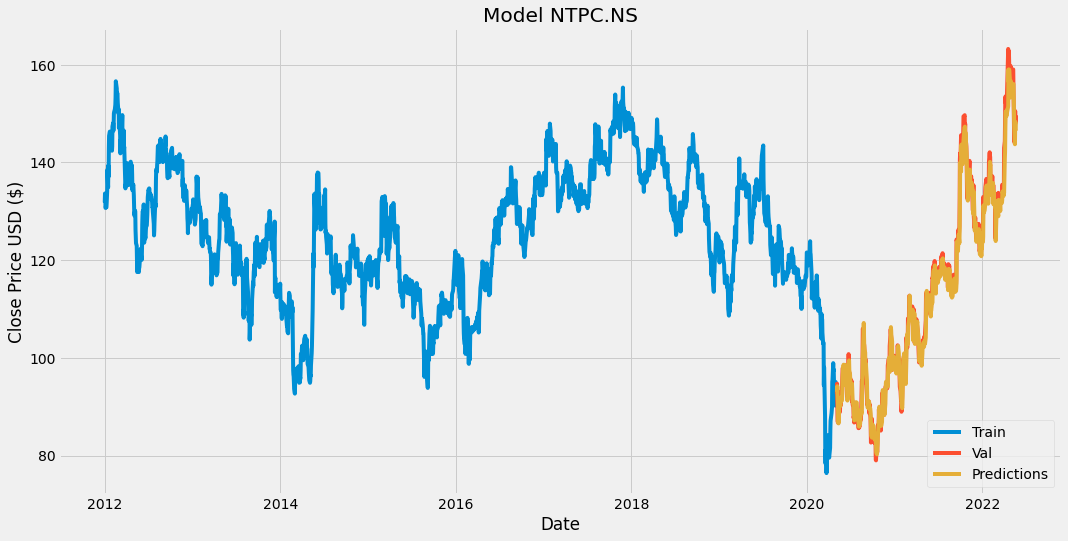

Close Price Prediction [[148.94612]]
Date
2012-01-02    131.791672
2012-01-03    133.625000
2012-01-04    133.458328
2012-01-05    130.666672
2012-01-06    130.791672
                 ...    
2022-05-16    148.250000
2022-05-17    150.500000
2022-05-18    148.500000
2022-05-19    148.000000
2022-05-20    149.600006
Name: Close, Length: 2559, dtype: float64
Date
2012-01-02    131.791672
2012-01-03    133.625000
2012-01-04    133.458328
2012-01-05    130.666672
2012-01-06    130.791672
                 ...    
2022-05-16    148.250000
2022-05-17    150.500000
2022-05-18    148.500000
2022-05-19    148.000000
2022-05-20    149.600006
Name: Close, Length: 2559, dtype: float64


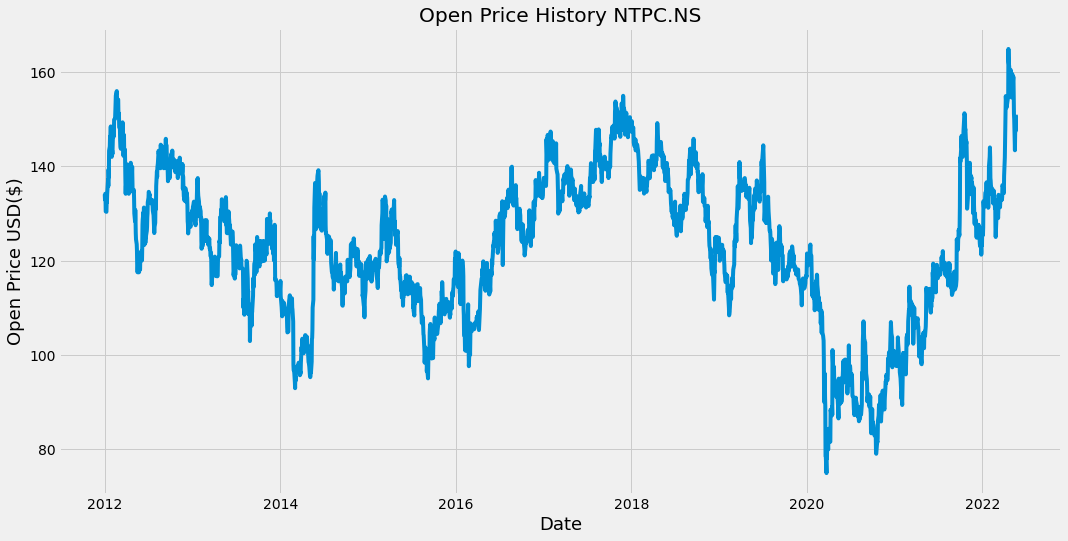

[array([0.65712972, 0.64462972, 0.65851861, 0.65342591, 0.61685194,
       0.6159259 , 0.63953702, 0.63814813, 0.65759257, 0.66685195,
       0.69324084, 0.67657417, 0.71592591, 0.69740751, 0.75990751,
       0.77009258, 0.7937037 , 0.79138894, 0.81731481, 0.75620369,
       0.7455556 , 0.76037036, 0.76037036, 0.75203703, 0.81592592,
       0.81175925, 0.79277783, 0.80666672, 0.83351863, 0.8344445 ,
       0.83583339, 0.85064815, 0.87055561, 0.89000006, 0.90064815,
       0.88537037, 0.85435196, 0.8812037 , 0.88074085, 0.8437037 ,
       0.84277783, 0.84833339, 0.81546307, 0.81407418, 0.78351862,
       0.76962973, 0.76453703, 0.78814814, 0.76638894, 0.78814814,
       0.81222227, 0.82703703, 0.7737964 , 0.74787036, 0.76037036,
       0.79740751, 0.75342592, 0.76268529, 0.72101862, 0.68629639])]
[0.6585186139016566]

[array([0.65712972, 0.64462972, 0.65851861, 0.65342591, 0.61685194,
       0.6159259 , 0.63953702, 0.63814813, 0.65759257, 0.66685195,
       0.69324084, 0.67657417, 0.715

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


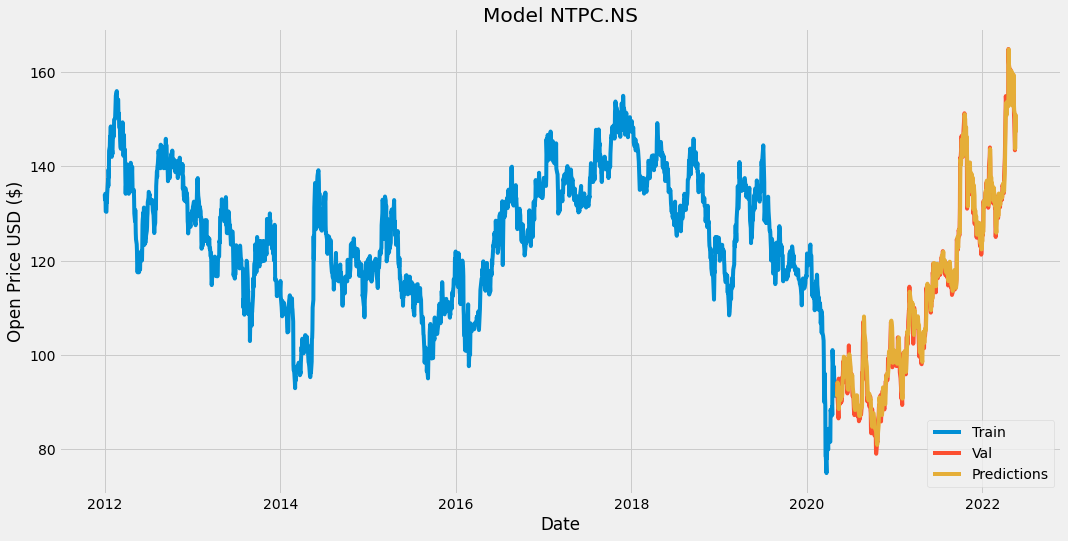

Open Price Prediction [[151.1117]]
Date
2012-01-02    134.041672
2012-01-03    132.916672
2012-01-04    134.166672
2012-01-05    133.708328
2012-01-06    130.416672
                 ...    
2022-05-16    143.399994
2022-05-17    147.500000
2022-05-18    150.500000
2022-05-19    147.500000
2022-05-20    150.949997
Name: Open, Length: 2559, dtype: float64
Open price : 151.1117
Close price : 148.94612
-2.1655731


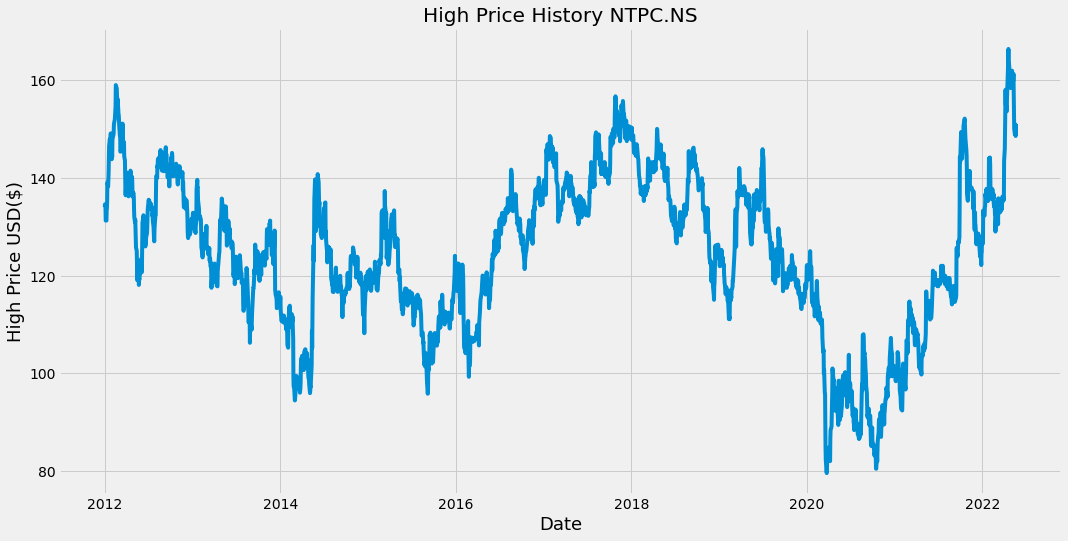

[array([0.62756967, 0.63381354, 0.62901059, 0.62804986, 0.59538901,
       0.59538901, 0.62084525, 0.62372709, 0.64245908, 0.68520655,
       0.67608065, 0.69433227, 0.70778094, 0.73948122, 0.77118151,
       0.78751201, 0.7841498 , 0.78366944, 0.8009605 , 0.76253597,
       0.73996159, 0.75052823, 0.74572527, 0.78655128, 0.79519682,
       0.79663774, 0.8009605 , 0.82113341, 0.82545618, 0.83410171,
       0.84418817, 0.85427462, 0.86532181, 0.91479335, 0.90662818,
       0.88453398, 0.86916421, 0.88261287, 0.85955812, 0.84803074,
       0.84466853, 0.83746392, 0.8192123 , 0.79567718, 0.80912585,
       0.75773284, 0.7601345 , 0.77310279, 0.75965413, 0.79231497,
       0.81152732, 0.82401526, 0.76157542, 0.75677229, 0.77550427,
       0.78078759, 0.74668583, 0.73707974, 0.69481264, 0.66311235])]
[0.6549471848064335]

[array([0.62756967, 0.63381354, 0.62901059, 0.62804986, 0.59538901,
       0.59538901, 0.62084525, 0.62372709, 0.64245908, 0.68520655,
       0.67608065, 0.69433227, 0.707

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


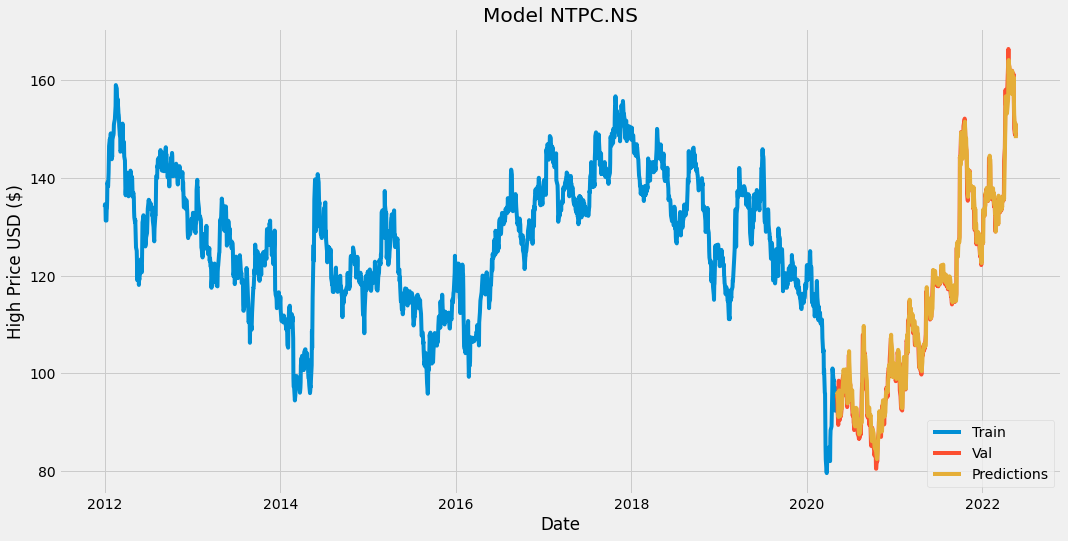

High Price Prediction [[151.07828]]
Date
2012-01-02    134.041672
2012-01-03    134.583328
2012-01-04    134.166672
2012-01-05    134.083328
2012-01-06    131.250000
                 ...    
2022-05-16    148.899994
2022-05-17    150.750000
2022-05-18    150.899994
2022-05-19    148.550003
2022-05-20    150.949997
Name: High, Length: 2559, dtype: float64
Date
2012-01-02    134.041672
2012-01-03    134.583328
2012-01-04    134.166672
2012-01-05    134.083328
2012-01-06    131.250000
                 ...    
2022-05-16    148.899994
2022-05-17    150.750000
2022-05-18    150.899994
2022-05-19    148.550003
2022-05-20    150.949997
Name: High, Length: 2559, dtype: float64


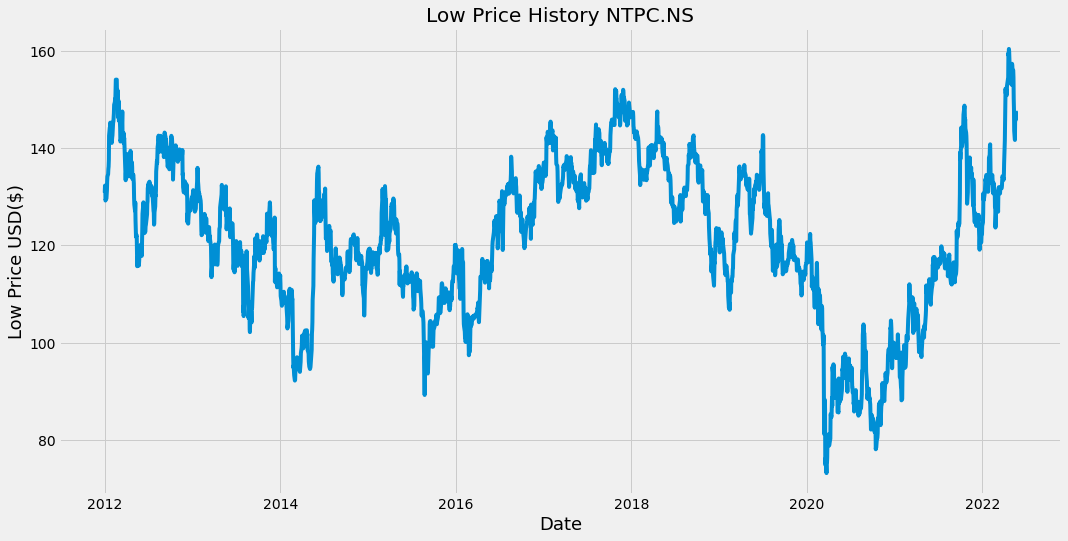

[array([0.66131182, 0.67756738, 0.67804554, 0.64266581, 0.64457828,
       0.6474469 , 0.65892137, 0.66609291, 0.68760754, 0.699082  ,
       0.70481924, 0.71677187, 0.7225091 , 0.73780833, 0.79565884,
       0.81478283, 0.81382669, 0.8262573 , 0.81143623, 0.79279022,
       0.77844713, 0.78609666, 0.79135591, 0.79613682, 0.82864793,
       0.82912592, 0.83773177, 0.84825009, 0.86833041, 0.8745458 ,
       0.88219533, 0.87932672, 0.90610059, 0.92761522, 0.92761522,
       0.89271365, 0.88315165, 0.90323197, 0.83820993, 0.87741442,
       0.87741442, 0.83056023, 0.84633762, 0.82721362, 0.81430485,
       0.78179374, 0.78609666, 0.78896528, 0.81047991, 0.82673546,
       0.85255301, 0.79709314, 0.79661498, 0.77844713, 0.80139607,
       0.78609666, 0.7899216 , 0.73780833, 0.7148594 , 0.69573523])]
[0.6904761529576572]

[array([0.66131182, 0.67756738, 0.67804554, 0.64266581, 0.64457828,
       0.6474469 , 0.65892137, 0.66609291, 0.68760754, 0.699082  ,
       0.70481924, 0.71677187, 0.722

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:562: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


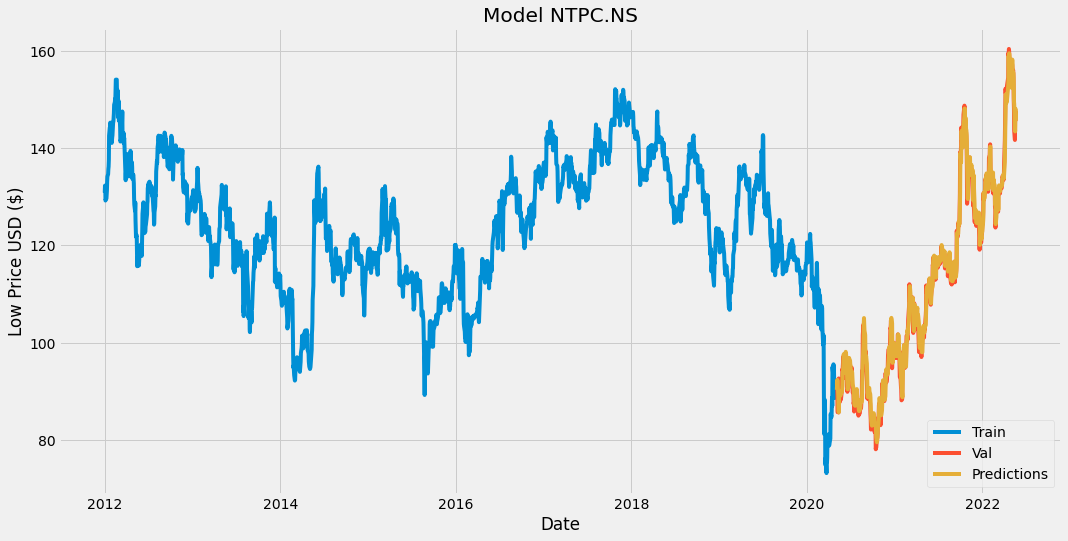

Low Price Prediction [[147.27487]]
Date
2012-01-02    130.833328
2012-01-03    132.250000
2012-01-04    132.291672
2012-01-05    129.208328
2012-01-06    129.375000
                 ...    
2022-05-16    141.649994
2022-05-17    146.300003
2022-05-18    147.199997
2022-05-19    145.750000
2022-05-20    147.649994
Name: Low, Length: 2559, dtype: float64
Open price : 151.1117
Close price : 148.94612
High price : 151.07828
Low price : 147.27487
Open to Close: -2.1655731


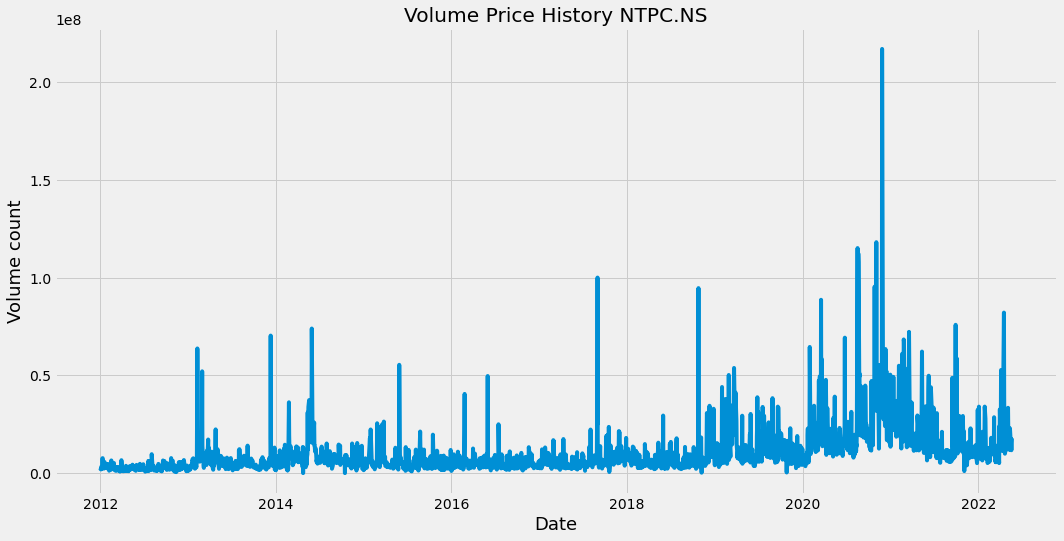

[array([0.0064709 , 0.00986442, 0.00864643, 0.01473329, 0.01209415,
       0.01191342, 0.03498949, 0.03526882, 0.01373269, 0.01870256,
       0.01057658, 0.01854946, 0.01383344, 0.02613739, 0.018747  ,
       0.01465228, 0.01227   , 0.02092472, 0.01272477, 0.01605345,
       0.01281101, 0.01367552, 0.02152705, 0.00948579, 0.01558242,
       0.00559235, 0.00644244, 0.01325027, 0.00802481, 0.00761537,
       0.00785769, 0.02244437, 0.02984176, 0.02395492, 0.0141479 ,
       0.00943098, 0.01120639, 0.01469258, 0.02372888, 0.00792541,
       0.00795898, 0.00938613, 0.00968234, 0.0053671 , 0.00571636,
       0.00734869, 0.01424115, 0.01178603, 0.0059655 , 0.00915534,
       0.01438886, 0.00921136, 0.00668212, 0.00876979, 0.01173219,
       0.01182863, 0.0035154 , 0.00802434, 0.00887579, 0.01634459])]
[0.03040833313385415]

[array([0.0064709 , 0.00986442, 0.00864643, 0.01473329, 0.01209415,
       0.01191342, 0.03498949, 0.03526882, 0.01373269, 0.01870256,
       0.01057658, 0.01854946, 0.01

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


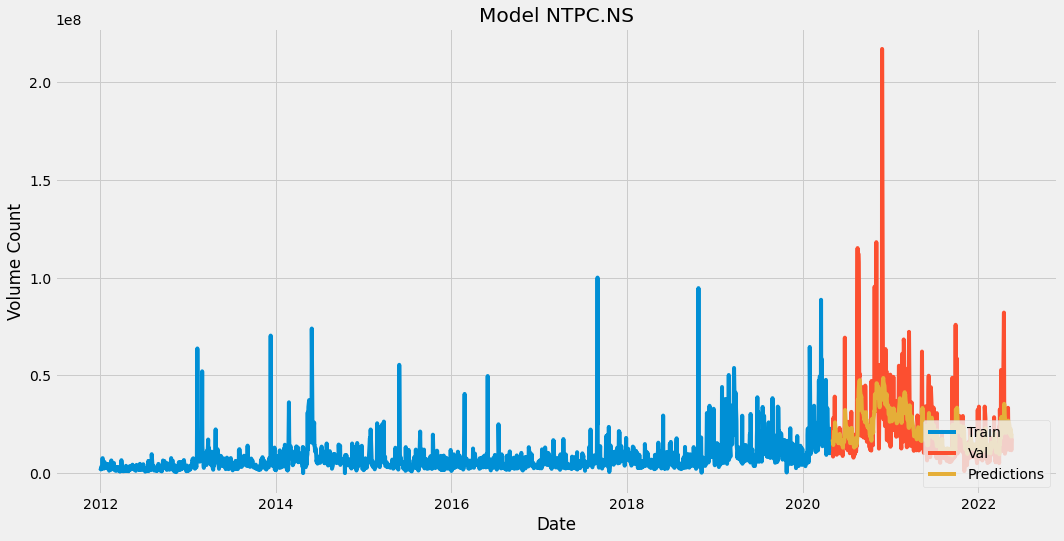

Volume Prediction [[16875086.]]
Date
2012-01-02     1404067.0
2012-01-03     2140398.0
2012-01-04     1876118.0
2012-01-05     3196855.0
2012-01-06     2624210.0
                 ...    
2022-05-16    16286682.0
2022-05-17    13925542.0
2022-05-18    17611218.0
2022-05-19    11701170.0
2022-05-20    17841739.0
Name: Volume, Length: 2559, dtype: float64
Date
2012-01-02     1404067.0
2012-01-03     2140398.0
2012-01-04     1876118.0
2012-01-05     3196855.0
2012-01-06     2624210.0
                 ...    
2022-05-16    16286682.0
2022-05-17    13925542.0
2022-05-18    17611218.0
2022-05-19    11701170.0
2022-05-20    17841739.0
Name: Volume, Length: 2559, dtype: float64
Prediction for 2022-05-23
High Price Prediction [[151.07828]]
Open Price Prediction [[151.1117]]
Close Price Prediction [[148.94612]]
Volume Prediction [[16875086.]]
Low Price Prediction [[147.27487]]


PermissionError: [Errno 13] Permission denied: 'Predictions/2022-05-23 O2C Prediction.csv'

In [4]:
#THE GRAND LOOP 
for i in range(START_SL,END_SL):
    stock_symbol=company_list[i]
    stock_symbol+='.NS'
    print(stock_symbol)

    #MACRO DEF
    

    STOCK = stock_symbol
    EPOCHS = 50
    open_model_path = "machine learning model/"+STOCK+"_open_model.h5"
    high_model_path = "machine learning model/"+STOCK+"_high_model.h5"
    low_model_path = "machine learning model/"+STOCK+"_low_model.h5"
    close_model_path = "machine learning model/"+STOCK+"_close_model.h5"
    volume_model_path = "machine learning model/"+STOCK+"_volume_model.h5"
    
    error_model_path = "machine learning model/"+STOCK+"_error_model.h5"
    error_data = "machine learning model/"+STOCK+"_error_data.csv"
    START_DATE = '2012-01-01'
    END_DATE = '2022-05-23'
    PREDICT_DATE = '2022-05-24'
    ERR_EPOCHS = 120

    #get the stock data
    df = web.DataReader(STOCK, data_source='yahoo' , start=START_DATE , end=END_DATE)
    
    #show the data
    #print(df)


    #get the number of rows and column in the data set
    #print(df.shape)

    #Visualing the closing price history
    plt.figure(figsize=(16,8))
    plt.title('Close Price History '+ STOCK)
    plt.plot(df['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel( 'Closing Price USD($)', fontsize=18)
    plt.show()

    #Create a new data
    data = df.filter(['Close'])
    #convert the dataframe to a numpy array
    dataset = data.values
    #get the number of rows to train the model on
    training_data_len = math.ceil(len(dataset)*.8)
    training_data_len

    #Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    scaled_data

    #creating the training data set
    #create the scaled training data set
    train_data = scaled_data[0:training_data_len,:]
    #split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])
        if i<=61:
            print(x_train)
            print(y_train)
            print()

    #Convert the X_train and Y_train to numpy arrays
    x_train , y_train = np.array(x_train), np.array(y_train)

    #Reshape the data
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
    x_train.shape

    #Building the LSTM model
    close_model = Sequential()
    close_model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
    close_model.add(LSTM(50, return_sequences=True))
    close_model.add(LSTM(50, return_sequences=True))
    close_model.add(LSTM(50, return_sequences=False))
    close_model.add(Dense(25))
    close_model.add(Dense(1))

    #compile the Model
    close_model.compile(optimizer='adam', loss='mean_squared_error')
    

    #train the model
    close_model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    
    


    #convert the data to a numpy array
    x_test = np.array(x_test)

    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

    #get the models predicted price values
    predictions = close_model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    rmse

    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model ' + STOCK)
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    #show the valid and predicted prices
    valid

    #get the Quote
    #stock_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
    #create new data frame
    new_df = df.filter(['Close'])
    #get the last 60 days closing price values and convert the dataframe to an array
    last_60_days = new_df[-60:].values
    #scale the data to be values between 0 and 1
    last_60_days_scaled = scaler.fit_transform(last_60_days)
    #create the empty list
    x_test = []
    #append the past 60 days
    x_test.append(last_60_days_scaled)
    #convert the x_test data set to a numpy array
    x_test = np.array(x_test)
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    close_pred_price = close_model.predict(x_test)
    #undo the scaling
    close_pred_price = scaler.inverse_transform(close_pred_price)
    print("Close Price Prediction ", end="")
    print(close_pred_price)


    #stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
    print(df['Close'])

    close_model.save(close_model_path)
    loaded_close_model = load_model(close_model_path)


    #stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
    print(df['Close'])

    if(SOUND==1):
        import winsound
        frequency = 2500  # Set Frequency To 2500 Hertz
        duration = 1000  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)



    #Visualing the closing price history
    plt.figure(figsize=(16,8))
    plt.title('Open Price History ' + STOCK)
    plt.plot(df['Open'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Open Price USD($)', fontsize=18)
    plt.show()

    #Create a new data
    data = df.filter(['Open'])
    #convert the dataframe to a numpy array
    dataset = data.values
    #get the number of rows to train the model on
    training_data_len = math.ceil(len(dataset)*.8)
    training_data_len

    #Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    scaled_data

    #creating the training data set
    #create the scaled training data set
    train_data = scaled_data[0:training_data_len,:]
    #split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])
        if i<=61:
            print(x_train)
            print(y_train)
            print()

    #Convert the X_train and Y_train to numpy arrays
    x_train , y_train = np.array(x_train), np.array(y_train)

    #Reshape the data
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
    x_train.shape

    #Building the LSTM model
    open_model = Sequential()
    open_model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
    open_model.add(LSTM(50, return_sequences=True))
    open_model.add(LSTM(50, return_sequences=True))
    open_model.add(LSTM(50, return_sequences=False))
    open_model.add(Dense(25))
    open_model.add(Dense(1))

    #compile the Model
    open_model.compile(optimizer='adam', loss='mean_squared_error')

    #train the model
    open_model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    
    


    #convert the data to a numpy array
    x_test = np.array(x_test)

    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

    #get the models predicted price values
    predictions = open_model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    rmse

    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model '+ STOCK)
    plt.xlabel('Date')
    plt.ylabel('Open Price USD ($)')
    plt.plot(train['Open'])
    plt.plot(valid[['Open', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    #show the valid and predicted prices
    valid

    #get the Quote
    #stock_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
    #create new data frame
    new_df = df.filter(['Open'])
    #get the last 60 days closing price values and convert the dataframe to an array
    last_60_days = new_df[-60:].values
    #scale the data to be values between 0 and 1
    last_60_days_scaled = scaler.fit_transform(last_60_days)
    #create the empty list
    x_test = []
    #append the past 60 days
    x_test.append(last_60_days_scaled)
    #convert the x_test data set to a numpy array
    x_test = np.array(x_test)
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    pred_open_price = open_model.predict(x_test)
    #undo the scaling
    pred_open_price = scaler.inverse_transform(pred_open_price)
    print("Open Price Prediction ", end="")
    print(pred_open_price)


    #stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
    print(df['Open'])

    open_model.save(open_model_path)
    loaded_open_model = load_model(open_model_path)


    if(SOUND==1):
        import winsound
        frequency = 2500  # Set Frequency To 2500 Hertz
        duration = 1000  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)



    print("Open price : ", end="") 
    print(pred_open_price[0][0])
    print("Close price : ", end="") 
    print(close_pred_price[0][0])

    print(close_pred_price[0][0]-pred_open_price[0][0]   )

    #Visualing the High price history
    plt.figure(figsize=(16,8))
    plt.title('High Price History '+ STOCK)
    plt.plot(df['High'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('High Price USD($)', fontsize=18)
    plt.show()

    #Create a new data
    data = df.filter(['High'])
    #convert the dataframe to a numpy array
    dataset = data.values
    #get the number of rows to train the model on
    training_data_len = math.ceil(len(dataset)*.8)
    training_data_len

    #Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    scaled_data

    #creating the training data set
    #create the scaled training data set
    train_data = scaled_data[0:training_data_len,:]
    #split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])
        if i<=61:
            print(x_train)
            print(y_train)
            print()

    #Convert the X_train and Y_train to numpy arrays
    x_train , y_train = np.array(x_train), np.array(y_train)

    #Reshape the data
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
    x_train.shape

    #Building the LSTM model
    high_model = Sequential()
    high_model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
    high_model.add(LSTM(50, return_sequences=True))
    high_model.add(LSTM(50, return_sequences=True))
    high_model.add(LSTM(50, return_sequences=False))
    high_model.add(Dense(25))
    high_model.add(Dense(1))

    #compile the Model
    high_model.compile(optimizer='adam', loss='mean_squared_error')


    #train the model
    high_model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    
    


    #convert the data to a numpy array
    x_test = np.array(x_test)

    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

    #get the models predicted price values
    predictions = high_model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    rmse

    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model ' + STOCK)
    plt.xlabel('Date')
    plt.ylabel('High Price USD ($)')
    plt.plot(train['High'])
    plt.plot(valid[['High', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    #show the valid and predicted prices
    valid

    #get the Quote
    #stock_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
    #create new data frame
    new_df = df.filter(['High'])
    #get the last 60 days closing price values and convert the dataframe to an array
    last_60_days = new_df[-60:].values
    #scale the data to be values between 0 and 1
    last_60_days_scaled = scaler.fit_transform(last_60_days)
    #create the empty list
    x_test = []
    #append the past 60 days
    x_test.append(last_60_days_scaled)
    #convert the x_test data set to a numpy array
    x_test = np.array(x_test)
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    high_pred_price = high_model.predict(x_test)
    #undo the scaling
    high_pred_price = scaler.inverse_transform(high_pred_price)    
    print("High Price Prediction ", end="")
    print(high_pred_price)


    #stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
    print(df['High'])

    high_model.save(high_model_path)
    loaded_high_model = load_model(high_model_path)


    #stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
    print(df['High'])

    if(SOUND==1):
        import winsound
        frequency = 2500  # Set Frequency To 2500 Hertz
        duration = 1000  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)


    #Visualing the low price history
    plt.figure(figsize=(16,8))
    plt.title('Low Price History ' + STOCK)
    plt.plot(df['Low'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Low Price USD($)', fontsize=18)
    plt.show()

    #Create a new data
    data = df.filter(['Low'])
    #convert the dataframe to a numpy array
    dataset = data.values
    #get the number of rows to train the model on
    training_data_len = math.ceil(len(dataset)*.8)
    training_data_len

    #Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    scaled_data

    #creating the training data set
    #create the scaled training data set
    train_data = scaled_data[0:training_data_len,:]
    #split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])
        if i<=61:
            print(x_train)
            print(y_train)
            print()

    #Convert the X_train and Y_train to numpy arrays
    x_train , y_train = np.array(x_train), np.array(y_train)

    #Reshape the data
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
    x_train.shape

    #Building the LSTM model
    low_model = Sequential()
    low_model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
    low_model.add(LSTM(50, return_sequences=True))
    low_model.add(LSTM(50, return_sequences=True))
    low_model.add(LSTM(50, return_sequences=False))
    low_model.add(Dense(25))
    low_model.add(Dense(1))

    #compile the Model
    low_model.compile(optimizer='adam', loss='mean_squared_error')

    #train the model
    low_model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    
    


    #convert the data to a numpy array
    x_test = np.array(x_test)

    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

    #get the models predicted price values
    predictions = open_model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    rmse
    
    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model ' + STOCK)
    plt.xlabel('Date')
    plt.ylabel('Low Price USD ($)')
    plt.plot(train['Low'])
    plt.plot(valid[['Low', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    #show the valid and predicted prices
    valid

    #get the Quote
    #stock_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
    #create new data frame
    new_df = df.filter(['Low'])
    #get the last 60 days closing price values and convert the dataframe to an array
    last_60_days = new_df[-60:].values
    #scale the data to be values between 0 and 1
    last_60_days_scaled = scaler.fit_transform(last_60_days)
    #create the empty list
    x_test = []
    #append the past 60 days
    x_test.append(last_60_days_scaled)
    #convert the x_test data set to a numpy array
    x_test = np.array(x_test)
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    low_pred_price = low_model.predict(x_test)
    #undo the scaling
    low_pred_price = scaler.inverse_transform(low_pred_price)
    print("Low Price Prediction ", end="")
    print(low_pred_price)


    #stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
    print(df['Low'])
    
    low_model.save(low_model_path)
    loaded_low_model = load_model(low_model_path)


    if(SOUND==1):
        import winsound
        frequency = 2500  # Set Frequency To 2500 Hertz
        duration = 500  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)
        winsound.Beep(frequency, duration)
        winsound.Beep(37, 50)


    print("Open price : ", end="") 
    print(pred_open_price[0][0])
    print("Close price : ", end="") 
    print(close_pred_price[0][0])
    print("High price : ", end="") 
    print(high_pred_price[0][0])
    print("Low price : ", end="") 
    print(low_pred_price[0][0])
    
    print("Open to Close: ", end="")
    print(close_pred_price[0][0]-pred_open_price[0][0]   )

    #Visualing the Volume history
    plt.figure(figsize=(16,8))
    plt.title('Volume Price History ' + STOCK)
    plt.plot(df['Volume'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Volume count', fontsize=18)
    plt.show()

    #Create a new data
    data = df.filter(['Volume'])
    #convert the dataframe to a numpy array
    dataset = data.values
    #get the number of rows to train the model on
    training_data_len = math.ceil(len(dataset)*.8)
    training_data_len

    #Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    scaled_data

    #creating the training data set
    #create the scaled training data set
    train_data = scaled_data[0:training_data_len,:]
    #split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])
        if i<=61:
            print(x_train)
            print(y_train)
            print()

    #Convert the X_train and Y_train to numpy arrays
    x_train , y_train = np.array(x_train), np.array(y_train)

    #Reshape the data
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
    x_train.shape

    #Building the LSTM model
    volume_model = Sequential()
    volume_model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
    volume_model.add(LSTM(50, return_sequences=True))
    volume_model.add(LSTM(50, return_sequences=True))
    volume_model.add(LSTM(50, return_sequences=False))
    volume_model.add(Dense(25))
    volume_model.add(Dense(1))

    #compile the Model
    volume_model.compile(optimizer='adam', loss='mean_squared_error')


    #train the model
    volume_model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    
    


    #convert the data to a numpy array
    x_test = np.array(x_test)
    
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

    #get the models predicted price values
    predictions = volume_model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    rmse

    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model '+ STOCK)
    plt.xlabel('Date')
    plt.ylabel('Volume Count')
    plt.plot(train['Volume'])
    plt.plot(valid[['Volume', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    #show the valid and predicted prices
    valid

    #get the Quote
    #stock_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
    #create new data frame
    new_df = df.filter(['Volume'])
    #get the last 60 days closing price values and convert the dataframe to an array
    last_60_days = new_df[-60:].values
    #scale the data to be values between 0 and 1
    last_60_days_scaled = scaler.fit_transform(last_60_days)
    #create the empty list
    x_test = []
    #append the past 60 days
    x_test.append(last_60_days_scaled)
    #convert the x_test data set to a numpy array
    x_test = np.array(x_test)
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    volume_pred_price = volume_model.predict(x_test)
    #undo the scaling
    volume_pred_price = scaler.inverse_transform(volume_pred_price)
    print("Volume Prediction ", end="")
    print(volume_pred_price)


    #stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
    print(df['Volume'])

    volume_model.save(volume_model_path)
    loaded_volume_model = load_model(volume_model_path)


    #stock_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
    print(df['Volume'])

    if(SOUND==1):
        import winsound
        frequency = 2500  # Set Frequency To 2500 Hertz
        duration = 500 # Set Duration To 1000 ms == 1 second
        winsound.Beep(2000, 300)
        winsound.Beep(frequency, duration)
        winsound.Beep(2000, 300)
        winsound.Beep(frequency, duration)
    
    from datetime import datetime
    from datetime import timedelta

  

    end_date = datetime.strptime(END_DATE,"%Y-%m-%d")
    predict_date = end_date+timedelta(days=1)

    import datetime
    import calendar

    def findDay(date):

        born = datetime.datetime.strptime(date, "%Y-%m-%d").weekday()
        return (calendar.day_name[born])

    # Driver program
    if (findDay(END_DATE)=="Friday"):

        predict_date = end_date+timedelta(days=3)

    if (findDay(END_DATE)=="Saturday"):

        predict_date = end_date+timedelta(days=2)
    
    if (findDay(END_DATE)=="Sunday"):

        predict_date = end_date+timedelta(days=1)


    pred_date = str(predict_date)
    pred_date = pred_date[0:10]
    print("Prediction for ", end="")
    print(pred_date)
    
    print("High Price Prediction ", end="")
    print(high_pred_price)
    print("Open Price Prediction ", end="")
    print(pred_open_price)
    print("Close Price Prediction ", end="")
    print(close_pred_price)
    print("Volume Prediction ", end="")
    print(volume_pred_price)
    print("Low Price Prediction ", end="")
    print(low_pred_price)
    
    #Writing into prediction file(CSV)
    header = pd.DataFrame(columns=['Stock','Date','Open','Close','High','Low','Volume','Prev. Close','%chng', 'prev. Close to Close','Open to Close', '%Open to Close'])
    #onerowstock = web.DataReader(STOCK, data_source='yahoo' , start=END_DATE , end=END_DATE)
    onerowstock = df.tail(1)
    prevclose = onerowstock['Close'].tolist()
    change = prevclose[0] - close_pred_price[0][0]
    change_percent = change/prevclose[0]*100
    O2C = pred_open_price[0][0] - close_pred_price[0][0]
    O2C_percent = O2C/pred_open_price[0][0]
    
    
    
    
    row = pd.DataFrame([[STOCK,pred_date,pred_open_price[0][0],close_pred_price[0][0],high_pred_price[0][0],low_pred_price[0][0],volume_pred_price[0][0],prevclose[0],change_percent,change,O2C,O2C_percent]], columns=['Stock','Date','Open','Close','High','Low','Volume','Prev. Close','%chng', 'prev. Close to Close','Open to Close', '%Open to Close'])
    stock_row = pd.DataFrame([[STOCK, END_DATE]],columns=['Stock','End_Date'])
    target_filename = "Predictions/"+pred_date + " O2C Prediction.csv"
    if(headcheck==0):
        header.to_csv(target_filename)
        headcheck=1
    row.to_csv(target_filename, mode="a" , header=False, index=False)
    stock_row.to_csv(ALL_STOCK_PATH, mode = "a" , header=False, index=False)
    


In [ ]:

tst = pd.read_csv(ALL_STOCK_PATH)
print(tst)


tst = pd.read_csv(target_filename)
print(tst)


In [ ]:
print("High Price Prediction ", end="")
print(high_pred_price)
print("Open Price Prediction ", end="")
print(pred_open_price)
print("Close Price Prediction ", end="")
print(close_pred_price)
print("Volume Prediction ", end="")
print(volume_pred_price)
print("Low Price Prediction ", end="")
print(low_pred_price)

In [ ]:
exe_time = time.time() - start_time
print("Time taken is :", end="")
print(exe_time/60,end=" mins")